# Setup

In [13]:
import os
import ray

In [2]:
import sys; sys.path.append("..")
import warnings; warnings.filterwarnings("ignore")
from dotenv import load_dotenv; load_dotenv()
%load_ext autoreload
%autoreload 2

In [14]:
from rag.config import ROOT_DIR


In [15]:
# Credentials
ray.init(runtime_env={
    "env_vars": {
        # "OPENAI_API_BASE": os.environ["OPENAI_API_BASE"],
        # "OPENAI_API_KEY": os.environ["OPENAI_API_KEY"], 
        # "ANYSCALE_API_BASE": os.environ["ANYSCALE_API_BASE"],
        # "ANYSCALE_API_KEY": os.environ["ANYSCALE_API_KEY"],
        # "DB_CONNECTION_STRING": os.environ["DB_CONNECTION_STRING"],
    },
    "working_dir": str(ROOT_DIR)
})

2024-07-31 17:52:11,233	INFO worker.py:1772 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8266 
2024-07-31 17:52:11,273	INFO packaging.py:530 -- Creating a file package for local directory '/home/hoanglv/works/LLM/RAG/ray_rag/notebooks/..'.
2024-07-31 17:52:11,297	INFO packaging.py:358 -- Pushing file package 'gcs://_ray_pkg_3a9c9845a05b689c.zip' (1.08MiB) to Ray cluster...
2024-07-31 17:52:11,315	INFO packaging.py:371 -- Successfully pushed file package 'gcs://_ray_pkg_3a9c9845a05b689c.zip'.


Python version:,3.10.14
Ray version:,2.34.0
Dashboard:,http://127.0.0.1:8266


In [16]:
ray.cluster_resources()

{'node:__internal_head__': 1.0,
 'node:192.168.8.101': 1.0,
 'CPU': 32.0,
 'memory': 14672471655.0,
 'accelerator_type:RTX': 1.0,
 'object_store_memory': 7336235827.0,
 'GPU': 2.0}

In [17]:
from rag.config import EMBEDDING_DIMENSIONS, MAX_CONTEXT_LENGTHS, PRICING


In [18]:
# Embedding dimensions
EMBEDDING_DIMENSIONS

{'thenlper/gte-base': 768,
 'thenlper/gte-large': 1024,
 'BAAI/bge-large-en': 1024,
 'text-embedding-ada-002': 1536,
 'gte-large-fine-tuned': 1024}

In [19]:
# LLM context lengths (1 token = 3/4 word)
MAX_CONTEXT_LENGTHS

{'gpt-4': 8192,
 'gpt-3.5-turbo': 4096,
 'gpt-3.5-turbo-16k': 16384,
 'gpt-4-1106-preview': 128000,
 'meta-llama/Llama-2-7b-chat-hf': 4096,
 'meta-llama/Llama-2-13b-chat-hf': 4096,
 'meta-llama/Llama-2-70b-chat-hf': 4096,
 'meta-llama/Llama-3-8b-chat-hf': 8192,
 'meta-llama/Llama-3-70b-chat-hf': 8192,
 'codellama/CodeLlama-34b-Instruct-hf': 16384,
 'mistralai/Mistral-7B-Instruct-v0.1': 65536,
 'mistralai/Mixtral-8x7B-Instruct-v0.1': 32768,
 'mistralai/Mixtral-8x22B-Instruct-v0.1': 65536}

In [20]:
# Anyscale pricing
PRICING

{'gpt-3.5-turbo': {'prompt': 1.5, 'sampled': 2},
 'gpt-4': {'prompt': 30, 'sampled': 60},
 'gpt-4-1106-preview': {'prompt': 10, 'sampled': 30},
 'llama-2-7b-chat-hf': {'prompt': 0.15, 'sampled': 0.15},
 'llama-2-13b-chat-hf': {'prompt': 0.25, 'sampled': 0.25},
 'llama-2-70b-chat-hf': {'prompt': 1, 'sampled': 1},
 'llama-3-8b-chat-hf': {'prompt': 0.15, 'sampled': 0.15},
 'llama-3-70b-chat-hf': {'prompt': 1, 'sampled': 1},
 'codellama-34b-instruct-hf': {'prompt': 1, 'sampled': 1},
 'mistral-7b-instruct-v0.1': {'prompt': 0.15, 'sampled': 0.15},
 'mixtral-8x7b-instruct-v0.1': {'prompt': 0.5, 'sampled': 0.5},
 'mixtral-8x22b-instruct-v0.1': {'prompt': 0.9, 'sampled': 0.9}}

In [21]:
from pathlib import Path
from rag.config import EFS_DIR

In [22]:
# Ray dataset
DOCS_DIR = Path(EFS_DIR, "docs.ray.io/en/master/")
ds = ray.data.from_items([{"path": path} for path in DOCS_DIR.rglob("*.html") if not path.is_dir()])
print(f"{ds.count()} documents")

3396 documents


In [23]:
import matplotlib.pyplot as plt
from rag.data import extract_sections
from rag.schemas import Record

In [24]:
# print(extract_sections({"path": sample_html_fp}))

In [25]:
sample_html_fp = Path(EFS_DIR, "docs.ray.io/en/master/rllib/rllib-env.html")
extract_sections(Record(path=sample_html_fp))[0]

{'source': 'https://docs.ray.io/en/master/rllib/rllib-env.html',
 'text': '\nEnvironments#\nRLlib works with several different types of environments, including Farama-Foundation Gymnasium, user-defined, multi-agent, and also batched environments.\nTip\nNot all environments work with all algorithms. See the algorithm overview for more information.\n'}

In [26]:
# Extract sections
sections_ds = ds.flat_map(extract_sections)
sections_ds.count()

2024-07-31 17:52:17,256	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-07-31_17-52-09_470273_1961170/logs/ray-data
2024-07-31 17:52:17,258	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[FlatMap(extract_sections)]


- FlatMap(extract_sections) 1: 0 bundle [00:00, ? bundle/s]

Running 0: 0 bundle [00:00, ? bundle/s]

(raylet) [2024-07-31 17:52:21,167 E 2008583 2008615] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-31_17-52-09_470273_1961170 is over 95% full, available space: 16013209600; capacity: 1006450962432. Object creation will fail if spilling is required.
(raylet) [2024-07-31 17:52:31,177 E 2008583 2008615] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-31_17-52-09_470273_1961170 is over 95% full, available space: 16012791808; capacity: 1006450962432. Object creation will fail if spilling is required.
(raylet) [2024-07-31 17:52:41,188 E 2008583 2008615] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-31_17-52-09_470273_1961170 is over 95% full, available space: 16012750848; capacity: 1006450962432. Object creation will fail if spilling is required.
(raylet) [2024-07-31 17:52:51,201 E 2008583 2008615] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-31_17-52-09_470273_1961170 is over 95% full, available space: 16012693504; capacity: 10

6086

In [27]:
section_lengths = []
for section in sections_ds.take_all():
    section_lengths.append(len(section["text"]))

2024-07-31 17:52:57,654	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-07-31_17-52-09_470273_1961170/logs/ray-data
2024-07-31 17:52:57,655	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[FlatMap(extract_sections)]


- FlatMap(extract_sections) 1: 0 bundle [00:00, ? bundle/s]

Running 0: 0 bundle [00:00, ? bundle/s]

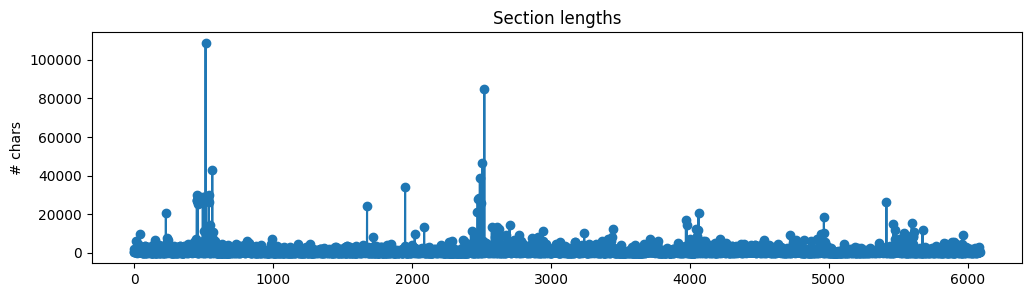

In [28]:
# Plot
plt.figure(figsize=(12, 3))
plt.plot(section_lengths, marker='o')
plt.title("Section lengths")
plt.ylabel("# chars")
plt.show()

In [29]:
from functools import partial
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [30]:
# Text splitter
chunk_size = 300
chunk_overlap = 50
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""],
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    length_function=len
)

In [31]:
# chunk a sample section
sample_section = sections_ds.take(1)[0]
chunks = text_splitter.create_documents(
    texts=[sample_section["text"]],
    metadatas=[{"source": sample_section["source"]}]
)
print(chunks)

2024-07-31 17:53:25,644	INFO dataset.py:2414 -- Tip: Use `take_batch()` instead of `take() / show()` to return records in pandas or numpy batch format.
2024-07-31 17:53:25,648	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-07-31_17-52-09_470273_1961170/logs/ray-data
2024-07-31 17:53:25,649	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[FlatMap(extract_sections)] -> LimitOperator[limit=1]


- FlatMap(extract_sections) 1: 0 bundle [00:00, ? bundle/s]

- limit=1 2: 0 bundle [00:00, ? bundle/s]

Running 0: 0 bundle [00:00, ? bundle/s]

[Document(metadata={'source': 'https://docs.ray.io/en/master/workflows/api/execution.html'}, page_content='Workflow Execution API#\nrun(dag,\xa0*args[,\xa0workflow_id,\xa0metadata])\nRun a workflow.\n\nrun_async(dag,\xa0*args[,\xa0workflow_id,\xa0metadata])\nRun a workflow asynchronously.')]


In [32]:
def chunk_section(section, chunk_size: int, chunk_overlap: int):
    text_splitter = RecursiveCharacterTextSplitter(
        separators=["\n\n", "\n", " ", ""],
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len
    )
    chunks = text_splitter.create_documents(
        texts=[section["text"]],
        metadatas=[{"source": section["source"]}]
    )
    return  [{"text": chunk.page_content, "source": chunk.metadata["source"]} for chunk in chunks]

In [33]:
# Scale chunking
chunk_ds = sections_ds.flat_map(
    partial(
        chunk_section,
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap
    )
)
print(f"{chunk_ds.count()} chunks")
chunk_ds.show(1)

2024-07-31 17:53:28,177	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-07-31_17-52-09_470273_1961170/logs/ray-data
2024-07-31 17:53:28,179	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[FlatMap(extract_sections)->FlatMap(partial)]


- FlatMap(extract_sections)->FlatMap(partial) 1: 0 bundle [00:00, ? bundle/s]

Running 0: 0 bundle [00:00, ? bundle/s]

2024-07-31 17:53:56,763	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-07-31_17-52-09_470273_1961170/logs/ray-data
2024-07-31 17:53:56,764	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[FlatMap(extract_sections)->FlatMap(partial)] -> LimitOperator[limit=1]


31480 chunks


- FlatMap(extract_sections)->FlatMap(partial) 1: 0 bundle [00:00, ? bundle/s]

- limit=1 2: 0 bundle [00:00, ? bundle/s]

Running 0: 0 bundle [00:00, ? bundle/s]

{'text': 'Workflow Execution API#\nrun(dag,\xa0*args[,\xa0workflow_id,\xa0metadata])\nRun a workflow.\n\nrun_async(dag,\xa0*args[,\xa0workflow_id,\xa0metadata])\nRun a workflow asynchronously.', 'source': 'https://docs.ray.io/en/master/workflows/api/execution.html'}


In [34]:
chunk_ds.show(1)

2024-07-31 17:53:59,352	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-07-31_17-52-09_470273_1961170/logs/ray-data
2024-07-31 17:53:59,353	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[FlatMap(extract_sections)->FlatMap(partial)] -> LimitOperator[limit=1]


- FlatMap(extract_sections)->FlatMap(partial) 1: 0 bundle [00:00, ? bundle/s]

- limit=1 2: 0 bundle [00:00, ? bundle/s]

Running 0: 0 bundle [00:00, ? bundle/s]

{'text': 'Workflow Execution API#\nrun(dag,\xa0*args[,\xa0workflow_id,\xa0metadata])\nRun a workflow.\n\nrun_async(dag,\xa0*args[,\xa0workflow_id,\xa0metadata])\nRun a workflow asynchronously.', 'source': 'https://docs.ray.io/en/master/workflows/api/execution.html'}


In [35]:
from rag.embed import EmbedChunks


In [11]:
embedding_model_name = "BAAI/bge-small-en-v1.5"
EmbedChunks(model_name=embedding_model_name, device="cpu")

In [36]:
embedding_model_name = "BAAI/bge-small-en-v1.5"
embedding_chunks = chunk_ds.map_batches(
    EmbedChunks,
    fn_constructor_kwargs={"model_name": embedding_model_name, "device": "cpu"},
    batch_size=100,
    num_gpus=1,
    concurrency=1
)

In [37]:
sample = embedding_chunks.take(1)
print ("embedding size:", len(sample[0]["embeddings"]))
print (sample[0]["text"])

2024-07-31 17:55:19,115	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-07-31_17-52-09_470273_1961170/logs/ray-data
2024-07-31 17:55:19,117	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[FlatMap(extract_sections)->FlatMap(partial)] -> ActorPoolMapOperator[MapBatches(EmbedChunks)] -> LimitOperator[limit=1]


- FlatMap(extract_sections)->FlatMap(partial) 1: 0 bundle [00:00, ? bundle/s]

- MapBatches(EmbedChunks) 2: 0 bundle [00:00, ? bundle/s]

- limit=1 3: 0 bundle [00:00, ? bundle/s]

Running 0: 0 bundle [00:00, ? bundle/s]

embedding size: 384
Workflow Execution API#
run(dag, *args[, workflow_id, metadata])
Run a workflow.

run_async(dag, *args[, workflow_id, metadata])
Run a workflow asynchronously.


# Index data

In [66]:
load_dotenv()

True

In [1]:
from qdrant_client import QdrantClient


client = QdrantClient(
    host="localhost",
    port=6345
)

client.get_collections()

CollectionsResponse(collections=[])